In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/ranjith-ms/ML_and_NN_course.git

fatal: destination path 'ML_and_NN_course' already exists and is not an empty directory.


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/ML_and_NN_course/module 1

/content/drive/My Drive/Colab Notebooks/ML_and_NN_course/module 1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn import metrics

In [ ]:
from utils import *

In [ ]:
df = pd.read_csv('kc_house_data.csv')         # Load the data from ' KC_House_Data.csv ' , csv file .
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df = df.drop(['id','date'],axis = 1)

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


More on Markers: https://matplotlib.org/3.1.1/api/markers_api.html

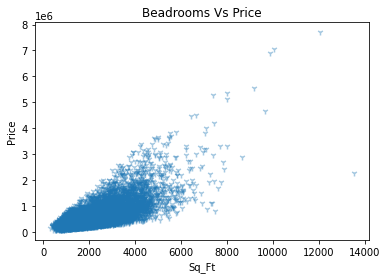

In [ ]:
plt.scatter(df['sqft_living'],df['price'],alpha=0.4,marker='1')
plt.title('Beadrooms Vs Price')
plt.xlabel('Sq_Ft')
plt.ylabel('Price')
#plt.legend() #No handles with labels found to put in legend.
plt.show()

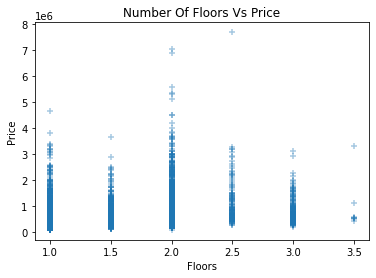

In [ ]:
plt.scatter(df['floors'],df['price'],alpha=0.4,marker='+')
plt.title('Number Of Floors Vs Price')
plt.xlabel('Floors')
plt.ylabel('Price')
#plt.legend() #No handles with labels found to put in legend.
plt.show()

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# First extract the target variable which is our House prices
Y = df.price.values

# Drop price from the house dataframe and create a matrix out of the house data
df = df.drop(['price'], axis=1)
X=np.matrix(df)
print(X)
# Store the column/feature names into a list "colnames"
colnames = df.columns
print(colnames)

[[ 3.00000e+00  1.00000e+00  1.18000e+03 ... -1.22257e+02  1.34000e+03
   5.65000e+03]
 [ 3.00000e+00  2.25000e+00  2.57000e+03 ... -1.22319e+02  1.69000e+03
   7.63900e+03]
 [ 2.00000e+00  1.00000e+00  7.70000e+02 ... -1.22233e+02  2.72000e+03
   8.06200e+03]
 ...
 [ 2.00000e+00  7.50000e-01  1.02000e+03 ... -1.22299e+02  1.02000e+03
   2.00700e+03]
 [ 3.00000e+00  2.50000e+00  1.60000e+03 ... -1.22069e+02  1.41000e+03
   1.28700e+03]
 [ 2.00000e+00  7.50000e-01  1.02000e+03 ... -1.22299e+02  1.02000e+03
   1.35700e+03]]
Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [ ]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split( X , Y , train_size = 0.8 , random_state = 3 )

print("X_train :- ",X_train)
print("X_test :- ",X_test)
print("Y_train :- ",Y_train)
print("Y_test :- ",Y_test)


X_train :-  [[ 3.00000e+00  2.00000e+00  1.51000e+03 ... -1.22079e+02  2.06000e+03
   6.77560e+04]
 [ 3.00000e+00  2.50000e+00  1.97000e+03 ... -1.22003e+02  2.91000e+03
   1.01494e+05]
 [ 3.00000e+00  2.00000e+00  1.44000e+03 ... -1.22184e+02  1.70000e+03
   7.24500e+03]
 ...
 [ 3.00000e+00  2.50000e+00  2.14000e+03 ... -1.22322e+02  1.99000e+03
   7.62800e+03]
 [ 2.00000e+00  1.75000e+00  1.21000e+03 ... -1.22450e+02  2.02000e+03
   1.85565e+05]
 [ 2.00000e+00  1.00000e+00  6.10000e+02 ... -1.22391e+02  8.70000e+02
   5.16000e+03]]
X_test :-  [[ 3.00000e+00  1.75000e+00  1.60000e+03 ... -1.22159e+02  1.75000e+03
   9.82900e+03]
 [ 5.00000e+00  4.00000e+00  4.51000e+03 ... -1.22228e+02  3.51000e+03
   1.35000e+04]
 [ 4.00000e+00  2.75000e+00  3.19000e+03 ... -1.21989e+02  3.15900e+03
   5.61500e+03]
 ...
 [ 4.00000e+00  2.25000e+00  2.48000e+03 ... -1.22406e+02  3.03000e+03
   5.60000e+03]
 [ 5.00000e+00  4.00000e+00  4.42000e+03 ... -1.22151e+02  3.72000e+03
   3.70340e+04]
 [ 3.0000

Training Model -->

y = b0 + b1x1 + b2x2 + ........ + bnxn

In [ ]:
from sklearn.preprocessing import StandardScaler
lr = make_pipeline(StandardScaler(with_mean=True), linear_model.RidgeCV())
lr.fit(X_train, Y_train)
'''
lr = linear_model.LinearRegression(normalize = True)        # Creates Linear Regression Model .
lr.fit(X_train , Y_train)
'''

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


'\nlr = linear_model.LinearRegression(normalize = True)        # Creates Linear Regression Model .\nlr.fit(X_train , Y_train)\n'

In [ ]:
lr??

In [ ]:
#ranking(np.abs(lr.coef_), colnames)

AttributeError: ignored

In [ ]:
predictions=lr.predict(X_test)
test_error=metrics.mean_absolute_error(Y_test,predictions)
print("Mean absolute error on Test set: ",test_error)

predictions=lr.predict(X_train)
training_error=metrics.mean_absolute_error(Y_train,predictions)
print("Mean absolute error on Training set: ",training_error)

Mean absolute error on Test set:  123348.04256985924
Mean absolute error on Training set:  126982.10897175879


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
index=4 #Change  Index to see how it performs on other examples

check=X_train[index] 
check=np.array(check).reshape(1,-1)

print("predicted Value:",lr.predict(check))
print("True value: ",Y_train[index])

predicted Value: [445725.75479885]
True value:  499990.0


In [ ]:
Y.max(),Y.min(),Y.mean()

(7700000.0, 75000.0, 540088.1417665294)

In [ ]:
X_train[index]

matrix([[ 4.00000e+00,  2.75000e+00,  2.62000e+03,  7.00100e+03,
          2.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
          8.00000e+00,  2.62000e+03,  0.00000e+00,  2.01200e+03,
          0.00000e+00,  9.80450e+04,  4.74838e+01, -1.21769e+02,
          2.62000e+03,  6.54300e+03]])

In [ ]:
df.iloc[9]

bedrooms             3.0000
bathrooms            2.5000
sqft_living       1890.0000
sqft_lot          6560.0000
floors               2.0000
waterfront           0.0000
view                 0.0000
condition            3.0000
grade                7.0000
sqft_above        1890.0000
sqft_basement        0.0000
yr_built          2003.0000
yr_renovated         0.0000
zipcode          98038.0000
lat                 47.3684
long              -122.0310
sqft_living15     2390.0000
sqft_lot15        7570.0000
Name: 9, dtype: float64

In [ ]:
# change these values according to your house 
bedrooms       =   3.0000
bathrooms      =   2.0000
sqft_living    =   1680.0000
sqft_lot       =   8080.0000
floors         =   1.0000
waterfront     =   0.0000
view           =   0.0000
condition      =   3.0000
grade          =   8.0000
sqft_above     =   1680.0000
sqft_basement  =   0.0000
yr_built       =  1987.0000
yr_renovated   =   0.0000
zipcode        =  98074.0000
lat            =   47.6168
long           =   -122.0450
sqft_living15  =   1800.0000
sqft_lot15     =   7503.0000


#Creating array from the values taken
my_house=np.array([bedrooms,bathrooms, sqft_living, sqft_lot ,floors ,waterfront ,view ,condition,  grade,sqft_above,
          sqft_basement, yr_built, yr_renovated,zipcode, lat, long ,sqft_living15 ,sqft_lot15 ])

In [ ]:
print(" Predicted Values :- " , lr.predict(my_house.reshape( 1 , -1 )))

 Predicted Values :-  [440650.87260753]
